# Лабораторная работа №4

## Условие

Вариант №6

Распределения:

$$\mathbf{X} \sim \chi^2(2)$$
$$\mathbf{Y} \sim N(3, 1)$$

Объём выборки:

$$ n = 150 $$

## Импорты

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  
import pandas as pd

## Определения

In [2]:
df1 = 2
m2, std2 = 3, 1
n = 150

In [3]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [4]:
def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table

In [5]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## 1. Исходные данные

In [6]:
X = stats.chi2.rvs(df1, size=n)
Y = np.random.normal(m2, std2, n)

mprint(f"$X$: {X[:10].round(2)}")
mprint(f"$Y$: {Y[:10].round(2)}")

$X$: [0.48 4.44 1.15 1.02 0.67 0.56 3.73 0.31 0.79 0.31]

$Y$: [2.91 2.84 3.66 3.3  2.92 0.7  3.39 2.57 2.9  2.16]

### Характеристики наблюдаемых случайных величин

| СВ  | Распределение | Параметры                | Математическое ожидание, $m_i$ | Дисперсия, $\sigma_i^2$        | Объём выборки, $n_i$ |
| --- | ------------- | ------------------------ | -------------------------------- | -------------------------------- | -------------------- |
| $X$ | $\chi^2(2)$   | $k_1 = 2$                | $m_1 = k_1 = 2$                  | $\sigma_1^2 = 2 k_1 = 4$        | 150                  |
| $Y$ | $N(3, 1)$      | $m_2 = 3, \sigma_2 = 1$ | $m_2 = 3$                        | $\sigma_2^2 = 1$                | 150                  |

### Выборочные характеристики

In [7]:
mean_X = X.mean()
S_X = X.var(ddof=1)

mean_Y = Y.mean()
S_Y = Y.var(ddof=1)

r_XY = stats.pearsonr(X, Y)[0]
rho_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(f"$\\overline{{x}} =$ {mean_X:.2f}, $s_X^2 =$ {S_X:.2f}")
mprint(f"$\\overline{{y}} =$ {mean_Y:.2f}, $s_Y^2 =$ {S_Y:.2f}")

mprint(
    f"$r_{{XY}} =$ {r_XY:.2f}, $\\rho_{{XY}} =$ {rho_XY:.2f}, $\\tau_{{XY}} =$ {tau_XY:.2f}"
)

$\overline{x} =$ 1.84, $s_X^2 =$ 3.88

$\overline{y} =$ 3.07, $s_Y^2 =$ 1.04

$r_{XY} =$ 0.06, $\rho_{XY} =$ 0.07, $\tau_{XY} =$ 0.05

| СВ  | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | КК по Пирсону, $r_{XY}$ | КК по Спирмену, $\rho_{XY}$ | КК по Кендаллу, $\tau_{XY}$ |
| --- | --------------------------- | ------------------------- | ------------------------- | ---------------------------- | ---------------------------- |
| X   | 1.84                      | 3.88                    | 0.06                      | 0.07                         | 0.05                         |
| Y   | 3.07                      | 1.04                    | 0.06                      | 0.07                         | 0.05                         |

### Проверка значимости коэффициентов корреляции

In [8]:
z_r_XY = r_XY * sqrt(n - 2) / sqrt(1 - r_XY**2)
p_r_XY = stats.pearsonr(X, Y)[1]

z_rho_XY = rho_XY * sqrt(n - 2) / sqrt(1 - rho_XY**2)
p_rho_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * sqrt(9 * n * (n + 1)) / sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $r_{XY}$",
    f"$H_0$: $r_{{XY}} = 0$, $H_1$: $r_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_r_XY:.2f}, ",
    f"$p =$ {p_r_XY:.2f}",
    verdict(alpha, p_r_XY),
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $r_{XY}$

$H_0$: $r_{XY} = 0$, $H_1$: $r_{XY} \neq 0$

$z_{выб} =$ 0.78, 

$p =$ 0.44

$H_0$ принимается

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 0.83, 

$p =$ 0.41

$H_0$ принимается

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 0.95, 

$p =$ 0.35

$H_0$ принимается

| Статистическая гипотеза, $H_0$                 | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------------------------- | --------- | ------------------------------------------- | ------------------------------ |
| $H_0:\ r_{XY} = 0 \\H_1:\ r_{XY} \neq 0$       | 0.44      | $H_0$ принимается                           | Нет                            |
| $H_0:\ \rho_{XY} = 0 \\H_1:\ \rho_{XY} \neq 0$ | 0.41      | $H_0$ принимается                           | Нет                            |
| $H_0:\ \tau_{XY} = 0 \\H_1:\ \tau_{XY} \neq 0$ | 0.35      | $H_0$ принимается                           | Нет                            |

## 2. Визуальное представление двумерной выборки

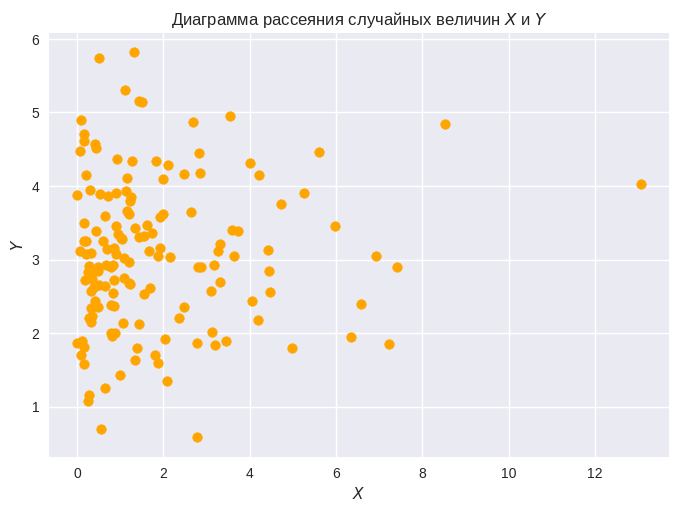

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = False  

plt.scatter(X, Y, color="orange")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.title(r"Диаграмма рассеяния случайных величин $X$ и $Y$")
plt.show()

## 3. Проверка независимости методом таблиц сопряженности

Статистическая гипотеза: $H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y); \quad H':\ \exists i, j: F_Y(y \mid X \in \Delta_i) \neq F_Y(y \mid X \in \Delta_j)$

### Эмпирическая таблица сопряженности

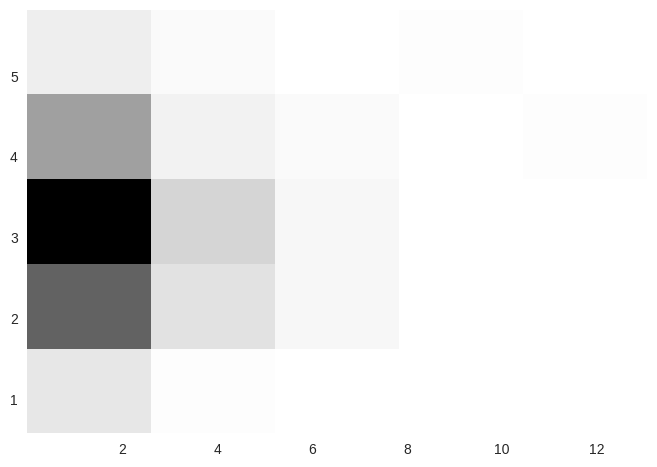

In [10]:
k = 5

emperical_table, bin_edges_X, bin_edges_Y, _ = plt.hist2d(X, Y, bins=k)

In [11]:
columns = [f"[{bin_edges_Y[i]:.2f}, {bin_edges_Y[i+1]:.2f})" for i in range(k - 1)] + [
    f"[{bin_edges_Y[-2]:.2f}, {bin_edges_Y[-1]:.2f}]"
]
indexes = [
    f"$\\Delta_{{{i+1}}} =$ [{bin_edges_X[i]:.2f}, {bin_edges_X[i+1]:.2f})"
    for i in range(k - 1)
] + [f"$\\Delta_{{{k}}} =$ [{bin_edges_X[-2]:.2f}, {bin_edges_X[-1]:.2f}]"]

emperical_table = pd.DataFrame(
    emperical_table,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
emperical_table

Y,"[0.58, 1.63)","[1.63, 2.68)","[2.68, 3.72)","[3.72, 4.77)","[4.77, 5.82]"
X,,,,,
"$\Delta_{1} =$ [0.00, 2.61)",8.0,31.0,45.0,21.0,6.0
"$\Delta_{2} =$ [2.61, 5.23)",1.0,9.0,12.0,5.0,2.0
"$\Delta_{3} =$ [5.23, 7.84)",0.0,3.0,3.0,2.0,0.0
"$\Delta_{4} =$ [7.84, 10.45)",0.0,0.0,0.0,0.0,1.0
"$\Delta_{5} =$ [10.45, 13.06]",0.0,0.0,0.0,1.0,0.0


In [12]:
print(dataframe_to_markdown(emperical_table))

| X\Y | [0.58, 1.63) | [1.63, 2.68) | [2.68, 3.72) | [3.72, 4.77) | [4.77, 5.82] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [0.00, 2.61) | 8.0 | 31.0 | 45.0 | 21.0 | 6.0 |
| $\Delta_{2} =$ [2.61, 5.23) | 1.0 | 9.0 | 12.0 | 5.0 | 2.0 |
| $\Delta_{3} =$ [5.23, 7.84) | 0.0 | 3.0 | 3.0 | 2.0 | 0.0 |
| $\Delta_{4} =$ [7.84, 10.45) | 0.0 | 0.0 | 0.0 | 0.0 | 1.0 |
| $\Delta_{5} =$ [10.45, 13.06] | 0.0 | 0.0 | 0.0 | 1.0 | 0.0 |



### Теоретическая таблица сопряженности

In [13]:
V1 = emperical_table.sum(axis=1).values
V1 = np.atleast_2d(V1).T
V1

array([[111.],
       [ 29.],
       [  8.],
       [  1.],
       [  1.]])

In [14]:
V2 = emperical_table.sum(axis=0).values
V2 = np.atleast_2d(V2)
V2

array([[ 9., 43., 60., 29.,  9.]])

In [15]:
theoretical_table = pd.DataFrame(
    np.dot(V1, V2) / n,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
theoretical_table

Y,"[0.58, 1.63)","[1.63, 2.68)","[2.68, 3.72)","[3.72, 4.77)","[4.77, 5.82]"
X,,,,,
"$\Delta_{1} =$ [0.00, 2.61)",6.66,31.820000,44.4,21.460000,6.66
"$\Delta_{2} =$ [2.61, 5.23)",1.74,8.313333,11.6,5.606667,1.74
"$\Delta_{3} =$ [5.23, 7.84)",0.48,2.293333,3.2,1.546667,0.48
"$\Delta_{4} =$ [7.84, 10.45)",0.06,0.286667,0.4,0.193333,0.06
"$\Delta_{5} =$ [10.45, 13.06]",0.06,0.286667,0.4,0.193333,0.06


In [16]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | [0.58, 1.63) | [1.63, 2.68) | [2.68, 3.72) | [3.72, 4.77) | [4.77, 5.82] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [0.00, 2.61) | 6.66 | 31.82 | 44.4 | 21.46 | 6.66 |
| $\Delta_{2} =$ [2.61, 5.23) | 1.74 | 8.31 | 11.6 | 5.61 | 1.74 |
| $\Delta_{3} =$ [5.23, 7.84) | 0.48 | 2.29 | 3.2 | 1.55 | 0.48 |
| $\Delta_{4} =$ [7.84, 10.45) | 0.06 | 0.29 | 0.4 | 0.19 | 0.06 |
| $\Delta_{5} =$ [10.45, 13.06] | 0.06 | 0.29 | 0.4 | 0.19 | 0.06 |



### Проверка статистической гипотезы

In [17]:
res = stats.chi2_contingency(emperical_table)
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    r"$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
    verdict(alpha, p),
)

### $\chi^2$-test

$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$

$z_{выб} =$ 22.03

$p =$ 0.14

$H_0$ принимается

| Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | --------- | ------------------------------------------- | ------------------------------ |
| 22.03                                  | 0.14      | $H_0$ принимается                           | Нет                            |

## 4. Исследование корреляционной связи

Случайная величина $U = \lambda X + (1 - \lambda)Y,\ \lambda \in [0;1]$

Случайная величина $V = \lambda X^3 + (1 - \lambda)Y^3,\ \lambda \in [0;1]$

In [18]:
lambdas = np.linspace(0, 1, 10000)

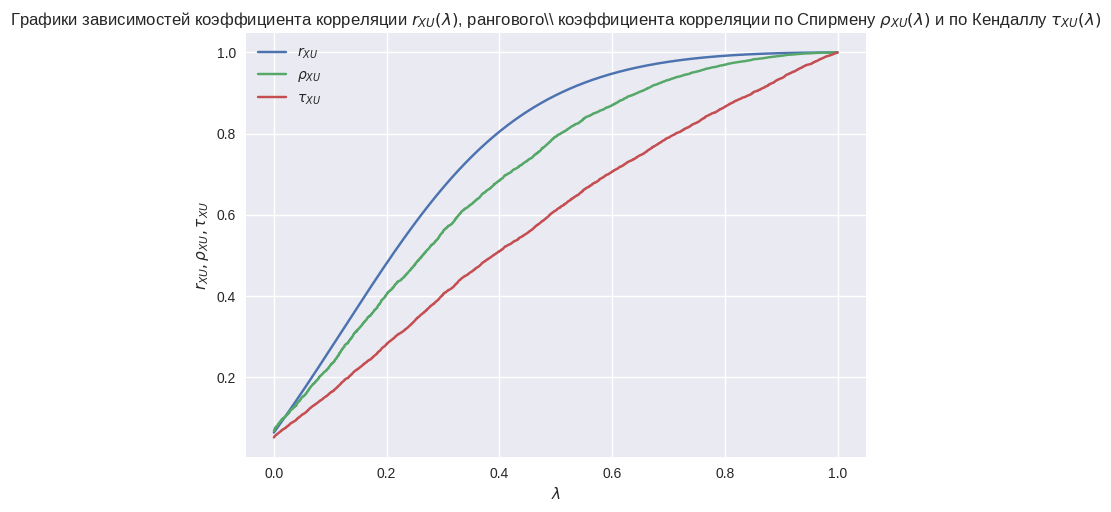

In [19]:
r_XU = []
rho_XU = []
tau_XU = []

for l in lambdas:
    U = l * X + (1 - l) * Y
    r_XU += [stats.pearsonr(X, U)[0]]
    rho_XU += [stats.spearmanr(X, U)[0]]
    tau_XU += [stats.kendalltau(X, U)[0]]

plt.plot(lambdas, r_XU, label=r"$r_{XU}$")
plt.plot(lambdas, rho_XU, label=r"$\rho_{XU}$")
plt.plot(lambdas, tau_XU, label=r"$\tau_{XU}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XU}, \rho_{XU}, \tau_{XU}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XU}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XU}(\lambda)$ и по Кендаллу $\tau_{XU}(\lambda)$"
)
plt.legend()
plt.show()

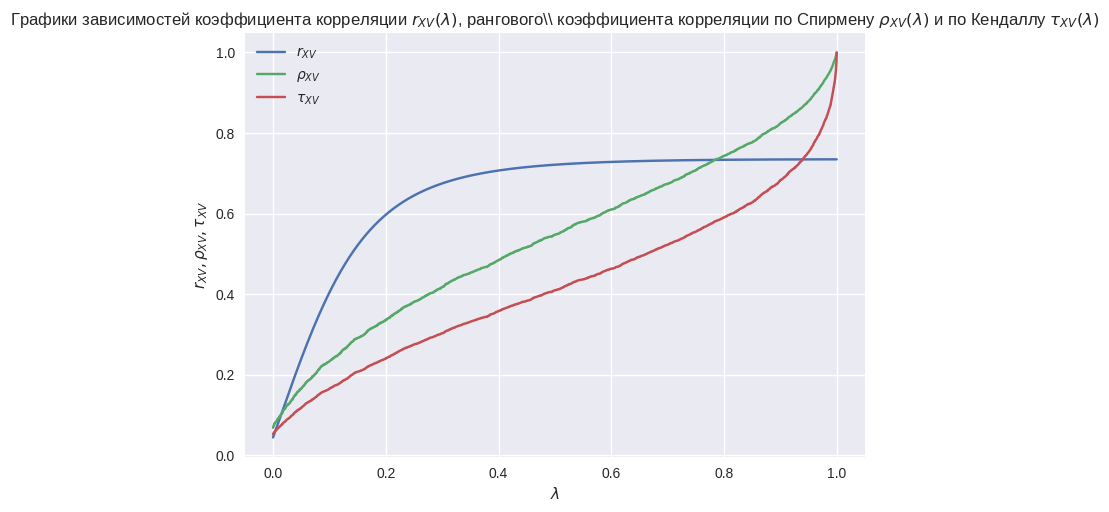

In [20]:
r_XV = []
rho_XV = []
tau_XV = []

for l in lambdas:
    V = l * X**3 + (1 - l) * Y**3
    r_XV += [stats.pearsonr(X, V)[0]]
    rho_XV += [stats.spearmanr(X, V)[0]]
    tau_XV += [stats.kendalltau(X, V)[0]]

plt.plot(lambdas, r_XV, label=r"$r_{XV}$")
plt.plot(lambdas, rho_XV, label=r"$\rho_{XV}$")
plt.plot(lambdas, tau_XV, label=r"$\tau_{XV}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XV}, \rho_{XV}, \tau_{XV}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XV}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XV}(\lambda)$ и по Кендаллу $\tau_{XV}(\lambda)$"
)
plt.legend()
plt.show()

**Выводы**

По первому графику, отображающему зависимости $r_{XU}(\lambda)$, $\rho_{XU}(\lambda)$, $\tau_{XU}(\lambda)$, видно, что при $\lambda \to 0$ все коэффициенты корреляции близки к нулю. Это согласуется с тем, что при $\lambda = 0$ имеем $U = Y$, а случайные величины $X$ и $Y$ независимы, следовательно, линейной и монотонной связи между $X$ и $U$ нет. При $\lambda \to 1$ все коэффициенты стремятся к $1$, поскольку при $\lambda = 1$ выполняется равенство $U = X$, то есть между $X$ и $U$ существует точная линейная функциональная зависимость. Для $0 < \lambda < 1$ коэффициенты корреляции монотонно возрастают с ростом $\lambda$, что отражает усиление линейной и монотонной связи между $X$ и $U$ по мере увеличения вклада $X$ в определение $U$.

По второму графику, на котором изображены зависимости $r_{XV}(\lambda)$, $\rho_{XV}(\lambda)$, $\tau_{XV}(\lambda)$, также наблюдается, что при $\lambda \to 0$ все коэффициенты близки к нулю (при $\lambda = 0$ имеем $V = Y^3$, независимую от $X$). При $\lambda \to 1$ ранговые коэффициенты $\rho_{XV}(\lambda)$ и $\tau_{XV}(\lambda)$ стремятся к $1$, что связано с тем, что при $\lambda = 1$ выполняется $V = X^3$, то есть между $X$ и $V$ существует строгая монотонная (но не линейная) функциональная зависимость. В то же время коэффициент Пирсона $r_{XV}(\lambda)$ при $\lambda \to 1$ остаётся существенно меньше $1$, что свидетельствует об отсутствии линейной зависимости между $X$ и $V$, несмотря на наличие сильной монотонной связи. Таким образом, второй график подчёркивает различие между линейной и монотонной корреляцией.


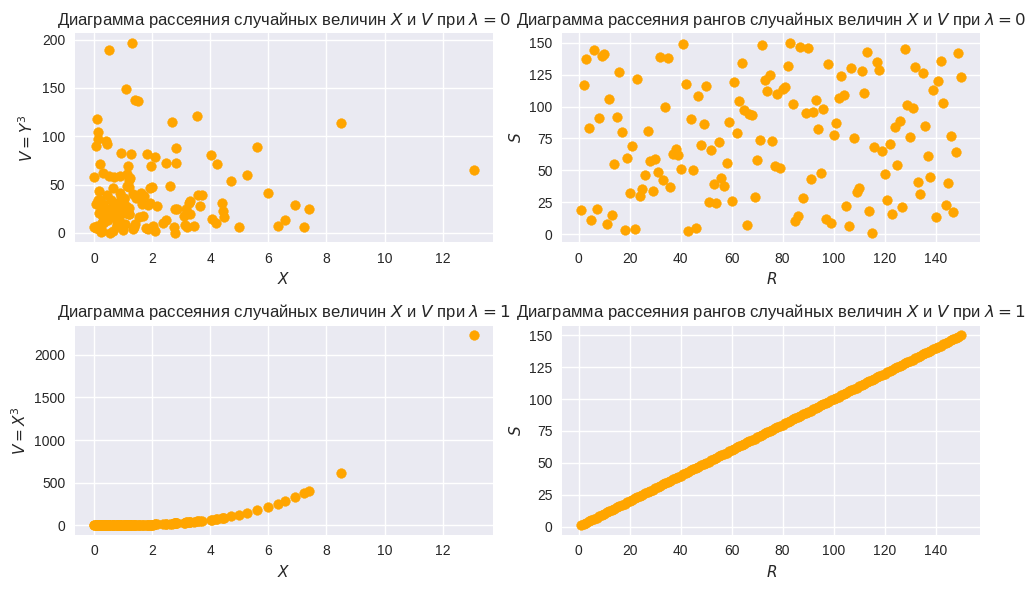

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].scatter(X, Y**3, color="orange")
axes[0, 0].set_xlabel(r"$X$")
axes[0, 0].set_ylabel(r"$V = Y^3$")
axes[0, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[0, 1].scatter(stats.rankdata(X), stats.rankdata(Y**3), color="orange")
axes[0, 1].set_xlabel(r"$R$")
axes[0, 1].set_ylabel(r"$S$")
axes[0, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[1, 0].scatter(X, X**3, color="orange")
axes[1, 0].set_xlabel(r"$X$")
axes[1, 0].set_ylabel(r"$V = X^3$")
axes[1, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 1$"
)

axes[1, 1].scatter(stats.rankdata(X), stats.rankdata(X**3), color="orange")
axes[1, 1].set_xlabel(r"$R$")
axes[1, 1].set_ylabel(r"$S$")
axes[1, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 1$"
)

plt.tight_layout()
plt.show()

Выводы:

Если $X$ и $V$ независимы, то и их ранги $R$ и $S$ также будут независимыми. 

Если $V = \varphi(X)$, $\varphi$ - монотонная функция, то переход к рангам "выпрямляет" монотонную зависимость исходных признаков.
